In [41]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }a
</style>
"""))


In [42]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import geopandas as gpd

In [43]:
# Get data of labor
sex_work = pd.read_stata( r'../_data/8_trab_sex_20.dta' )
sex_work

,cod_ubigeo,district,month,sex,empl
0,010101,CHACHAPOYAS,January,S.I.,171
1,010101,CHACHAPOYAS,January,Hombre,1959
2,010101,CHACHAPOYAS,January,Mujer,805
3,010101,CHACHAPOYAS,February,S.I.,158
4,010101,CHACHAPOYAS,February,Hombre,1798
...,...,...,...,...,...
53419,250401,PURUS,November,Hombre,2
53420,250401,PURUS,November,Mujer,3
53421,250401,PURUS,December,S.I.,0
53422,250401,PURUS,December,Hombre,2


In [44]:
sex_work[ 'dpt_code' ] = sex_work.cod_ubigeo.str[ :2 ].copy() # los dos primeros valores de ubigeo
sex_work[ 'prov_code' ] = sex_work.cod_ubigeo.str[ :4 ].copy() # los 4 primeros valores de ubigeo

# Sex work
women_work = sex_work[ sex_work.sex == 'Mujer' ].copy().reset_index( drop = True ) # filtro solo mujeres
women_work

,cod_ubigeo,district,month,sex,empl,dpt_code,prov_code
0,010101,CHACHAPOYAS,January,Mujer,805,01,0101
1,010101,CHACHAPOYAS,February,Mujer,812,01,0101
2,010101,CHACHAPOYAS,March,Mujer,804,01,0101
3,010101,CHACHAPOYAS,April,Mujer,678,01,0101
4,010101,CHACHAPOYAS,May,Mujer,589,01,0101
...,...,...,...,...,...,...,...
17803,250401,PURUS,August,Mujer,3,25,2504
17804,250401,PURUS,September,Mujer,3,25,2504
17805,250401,PURUS,October,Mujer,3,25,2504
17806,250401,PURUS,November,Mujer,3,25,2504


In [45]:
# get data from lima
women_work[ 'month' ] = pd.to_datetime( women_work.month , format = '%B' ) \
                                    .dt.strftime( '%m' ) \
                                    .astype( int ) # pasamos el mes a número
women_work

,cod_ubigeo,district,month,sex,empl,dpt_code,prov_code
0,010101,CHACHAPOYAS,1,Mujer,805,01,0101
1,010101,CHACHAPOYAS,2,Mujer,812,01,0101
2,010101,CHACHAPOYAS,3,Mujer,804,01,0101
3,010101,CHACHAPOYAS,4,Mujer,678,01,0101
4,010101,CHACHAPOYAS,5,Mujer,589,01,0101
...,...,...,...,...,...,...,...
17803,250401,PURUS,8,Mujer,3,25,2504
17804,250401,PURUS,9,Mujer,3,25,2504
17805,250401,PURUS,10,Mujer,3,25,2504
17806,250401,PURUS,11,Mujer,3,25,2504


In [47]:
# Sort by department and month
women_work.sort_values([ 'dpt_code', 'month'], inplace = True )

# Get the total number of women workers by dpt
dpt_women_work = women_work.groupby( [ 'dpt_code', 'month'], as_index = False )[['empl']] \
                            .sum() \
                            .rename( columns = {'empl' :'women_empl'})

# Sort by dpt code and month
dpt_women_work.sort_values([ 'dpt_code', 'month'], inplace = True )
dpt_women_work

# aparece ordenado por departamento y mes

,dpt_code,month,women_empl
0,01,1,2043
1,01,2,2059
2,01,3,2056
3,01,4,1811
4,01,5,1642
...,...,...,...
295,25,8,7425
296,25,9,7549
297,25,10,7751
298,25,11,7933


In [49]:
df2 = dpt_women_work.groupby( ['dpt_code'],as_index = False )[['women_empl']].mean()
df2
# finalmente un promedio por cada departamento

,dpt_code,women_empl
0,01,1947.750000
1,02,18277.000000
2,03,3077.666667
3,04,57583.583333
4,05,3976.750000
5,06,9634.333333
6,07,40806.416667
7,08,19503.666667
8,09,675.333333
9,10,6222.750000


## Shapefile

In [50]:
dpt_shp = gpd.read_file( r'../_data/INEI_LIMITE_DEPARTAMENTAL/INEI_LIMITE_DEPARTAMENTAL.shp' )

In [53]:
dpt_shp[['CCDD']].head(3)

,CCDD
0,01
1,02
2,03


In [54]:
df2[['dpt_code']].head(3)

,dpt_code
0,01
1,02
2,03


In [57]:
df3 = dpt_shp.merge( df2, left_on = 'CCDD', right_on = 'dpt_code'  )
df3.head()

,OBJECTID_1,OBJECTID,CCDD,NOMBDEP,CAPITAL,Shape_STAr,Shape_STLe,ORIG_FID,Shape_Leng,Shape_Area,CORREO,CONTACTO,WHATSAPP,geometry,dpt_code,women_empl
0,1,1.0,01,AMAZONAS,CHACHAPOYAS,3.203006,12.912088,0,12.912088,3.203006,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...",01,1947.750000
1,2,2.0,02,ANCASH,HUARAZ,2.954592,11.780424,1,11.780424,2.954592,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.64697 -8.05086, -77.64689 -8.051...",02,18277.000000
2,3,3.0,03,APURIMAC,ABANCAY,1.765933,7.730154,2,7.730154,1.765933,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-73.74655 -13.17442, -73.7457 -13.17...",03,3077.666667
3,4,4.0,04,AREQUIPA,AREQUIPA,5.330203,17.405040,3,17.405040,5.330203,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6...",04,57583.583333
4,5,5.0,05,AYACUCHO,AYACUCHO,3.643705,17.127166,4,17.127166,3.643705,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-74.34843 -12.17503, -74.35 -12.1758...",05,3976.750000


<Axes: >

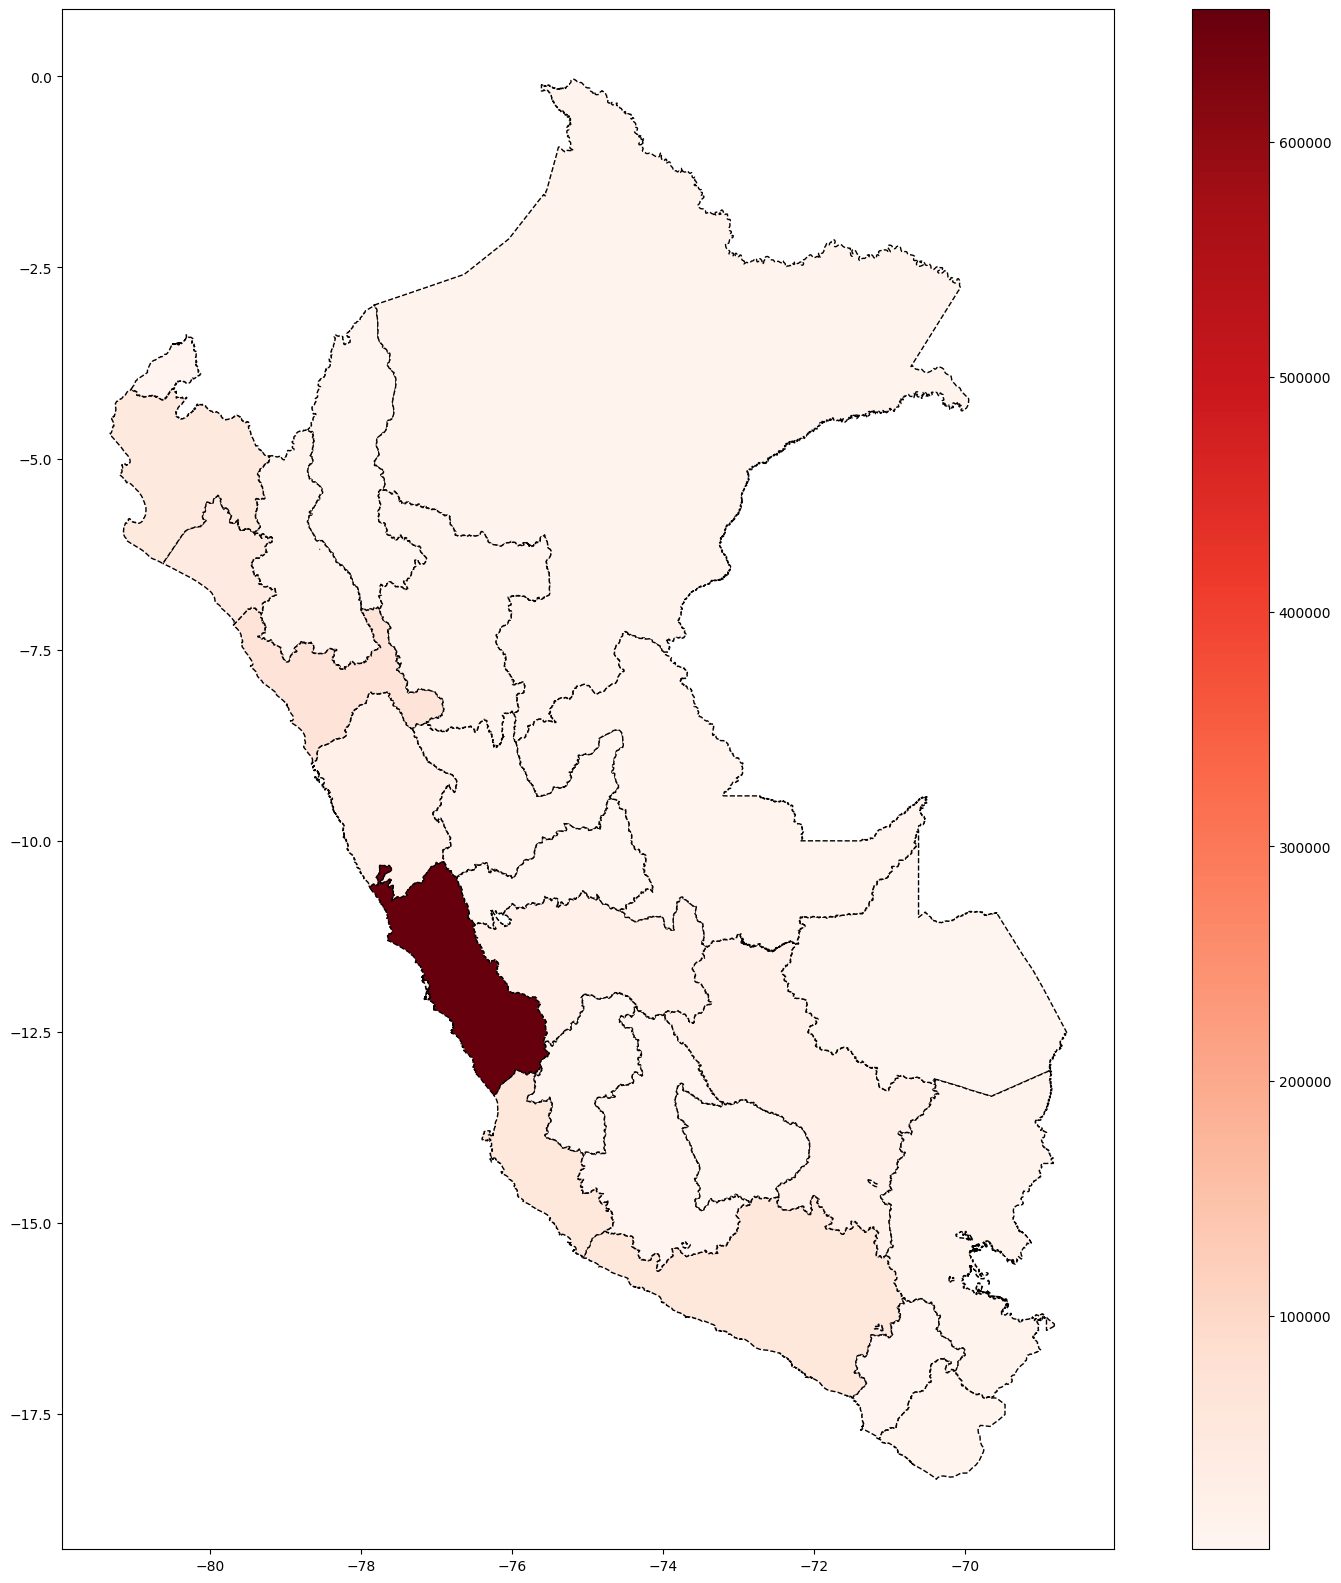

In [66]:
df3.plot( column='women_empl', cmap='Reds', figsize=(20, 20), linestyle='--',edgecolor='black', legend = True)

In [74]:
#pip install mapclassify

In [72]:
import mapclassify

<Axes: >

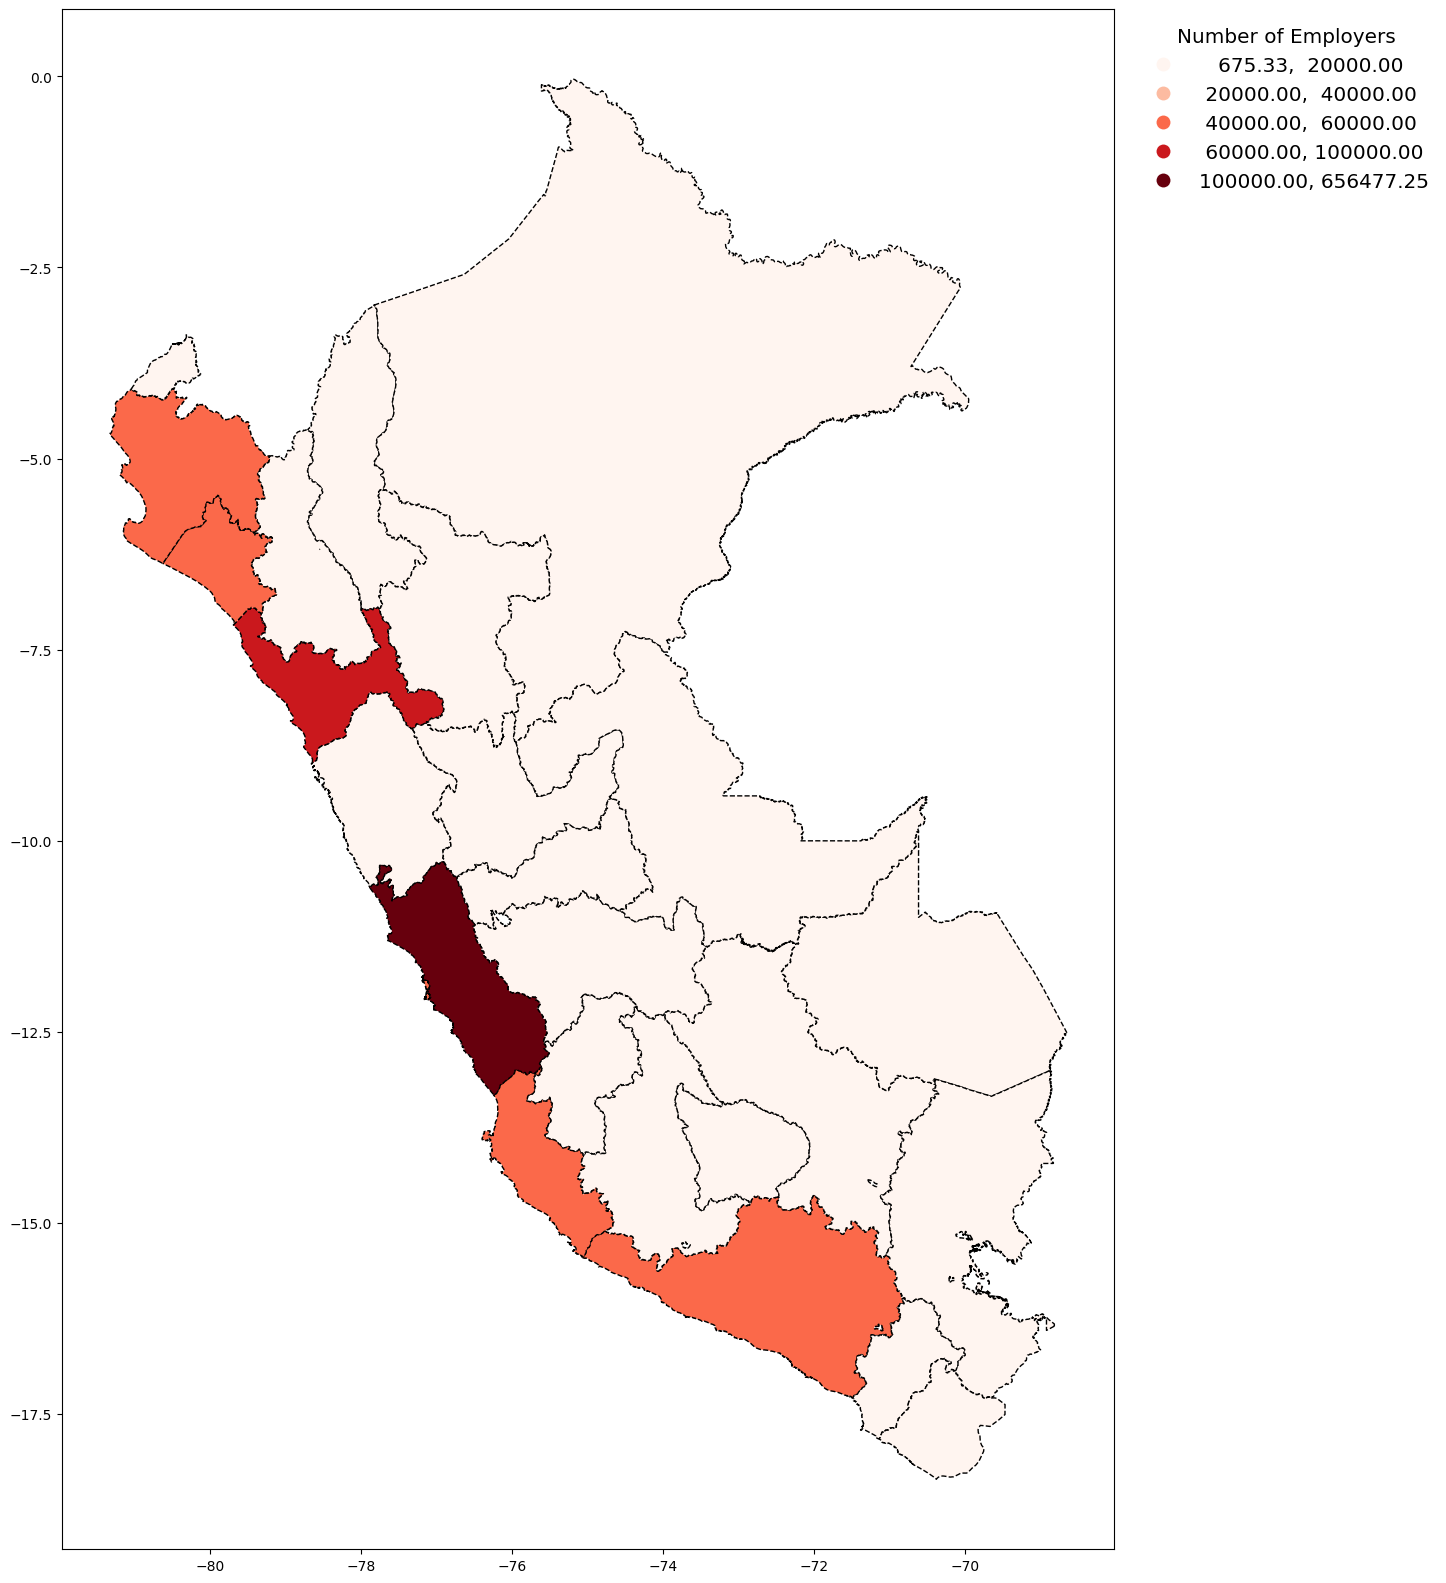

In [75]:
fig, ax = plt.subplots(figsize=(20, 20))
df3.plot(ax = ax, column='women_empl', cmap= 'Reds', figsize=(20, 20), linestyle='--', edgecolor='black', legend = True,  
         scheme = "User_Defined", # ANTES ERA CONTINUO
         classification_kwds = dict( bins = [ 20000, 40000, 60000, 100000  ] ), 
         legend_kwds = dict(loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Number of Employers", 
                            title_fontsize = 'x-large', 
                            frameon= False )
        )

<Axes: >

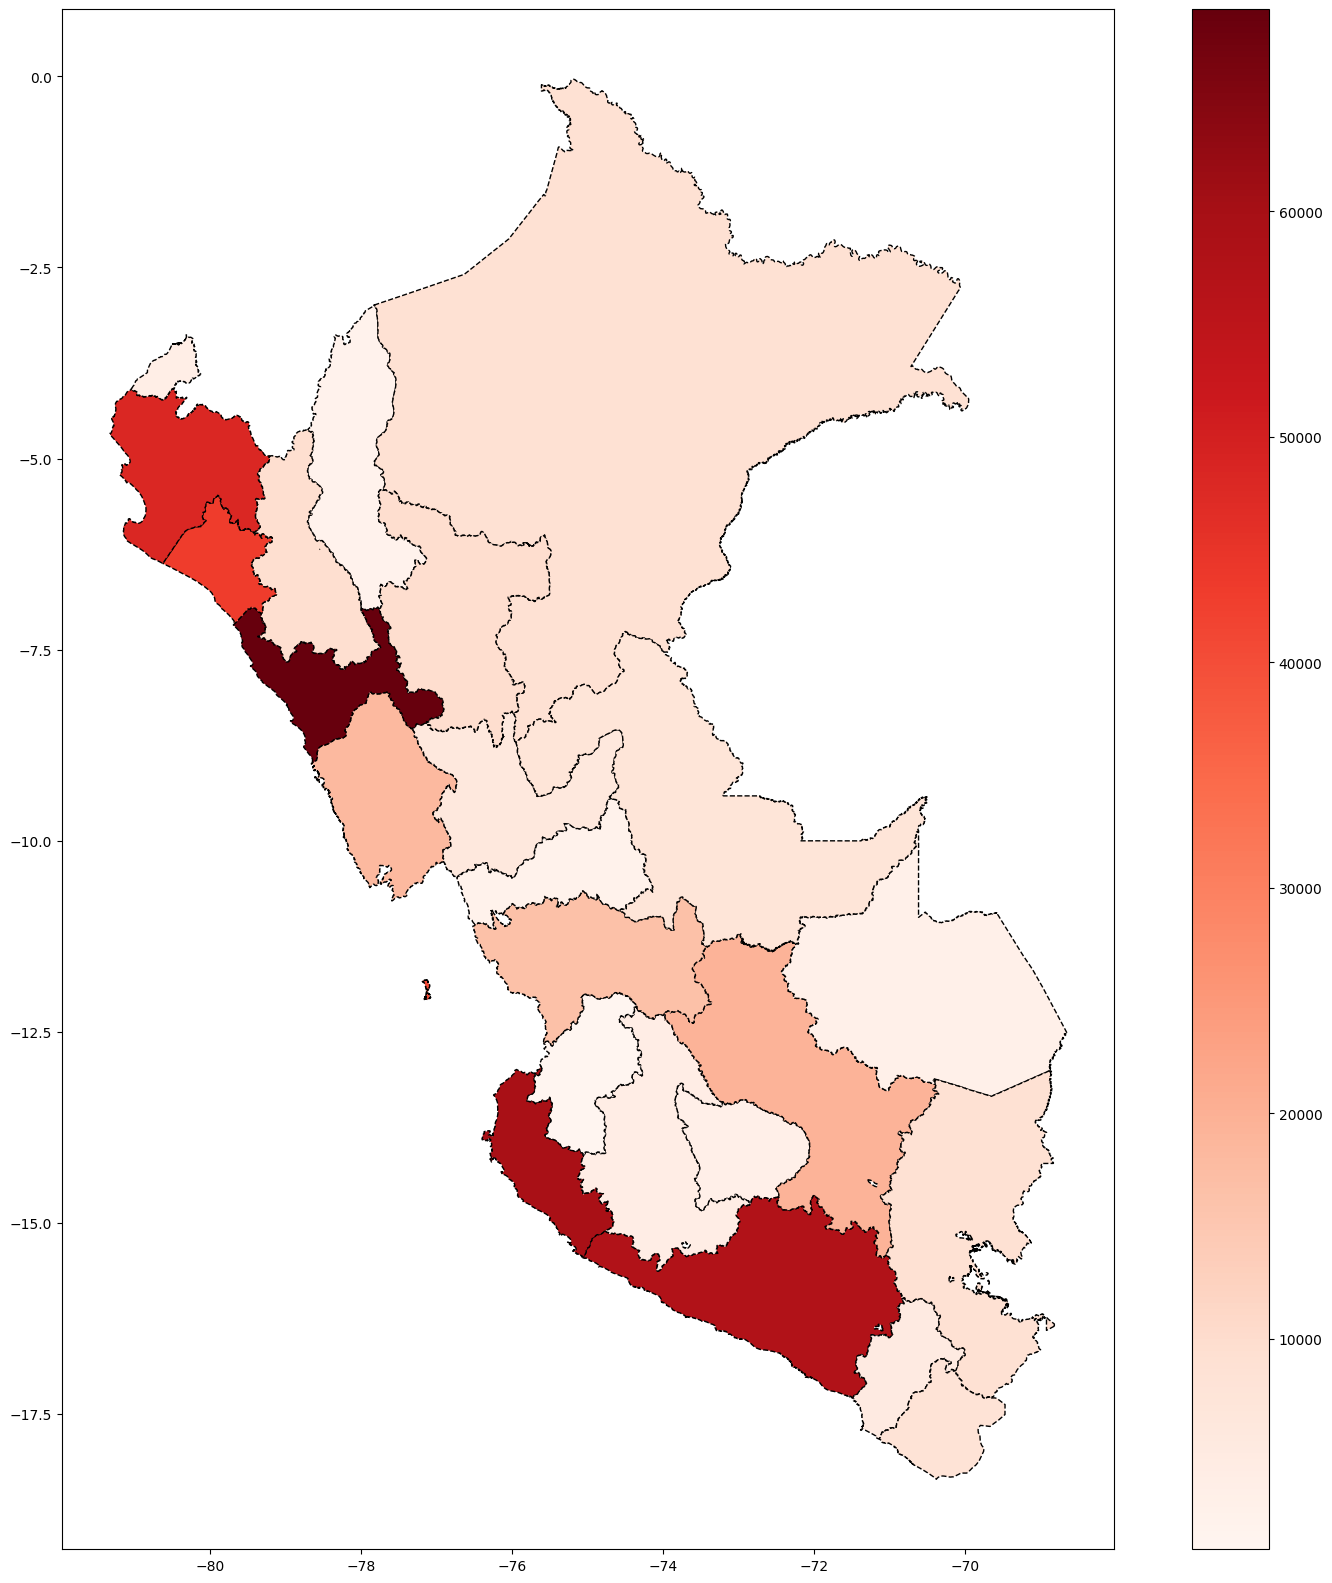

In [76]:
# Si no quiero que aparezca Lima
df3[ df3.CCDD != "15" ].plot( column='women_empl', cmap='Reds', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True)

In [82]:
sex_work.groupby( ['dpt_code', 'month', 'sex'], observed=False, as_index = False )[['empl']].sum()

,dpt_code,month,sex,empl
0,01,January,S.I.,472
1,01,January,Hombre,5108
2,01,January,Mujer,2043
3,01,February,S.I.,441
4,01,February,Hombre,4951
...,...,...,...,...
895,25,November,Hombre,19758
896,25,November,Mujer,7933
897,25,December,S.I.,1848
898,25,December,Hombre,19304


In [83]:
sex_work.groupby( ['dpt_code', 'month', 'sex'], observed=False,as_index = False )[['empl']].sum().pivot( index = [ 'dpt_code', 'month' ] , columns = 'sex',values='empl')

sex                 S.I.  Hombre  Mujer
dpt_code month                         
01       January     472    5108   2043
         February    441    4951   2059
         March       423    4459   2056
         April       314    3211   1811
         May         297    3049   1642
...                  ...     ...    ...
25       August     1654   16885   7425
         September  1689   17886   7549
         October    1812   19223   7751
         November   1882   19758   7933
         December   1848   19304   8087

[300 rows x 3 columns]

In [85]:
# Respecto a los hombres, ¿qué proporción de mujeres trabaja en planilla?
df4 = sex_work.groupby( ['dpt_code', 'month', 'sex'], observed = False, as_index = False )[['empl']].sum() \
        .pivot( index = [ 'dpt_code', 'month' ] , columns = 'sex',values='empl') \
        .reset_index()
df4

sex,dpt_code,month,S.I.,Hombre,Mujer
0,01,January,472,5108,2043
1,01,February,441,4951,2059
2,01,March,423,4459,2056
3,01,April,314,3211,1811
4,01,May,297,3049,1642
...,...,...,...,...,...
295,25,August,1654,16885,7425
296,25,September,1689,17886,7549
297,25,October,1812,19223,7751
298,25,November,1882,19758,7933


In [86]:
df4[ 'prop_wom' ] = ( df4.Mujer * 100 / df4.Hombre )

In [92]:
dpt_shp[['CCDD']].head(3), df4[['dpt_code']].head(3)

(  CCDD
 0   01
 1   02
 2   03,
 sex dpt_code
 0         01
 1         01
 2         01)

In [93]:
df5 = dpt_shp.merge( df4, left_on = 'CCDD', right_on = 'dpt_code'  )

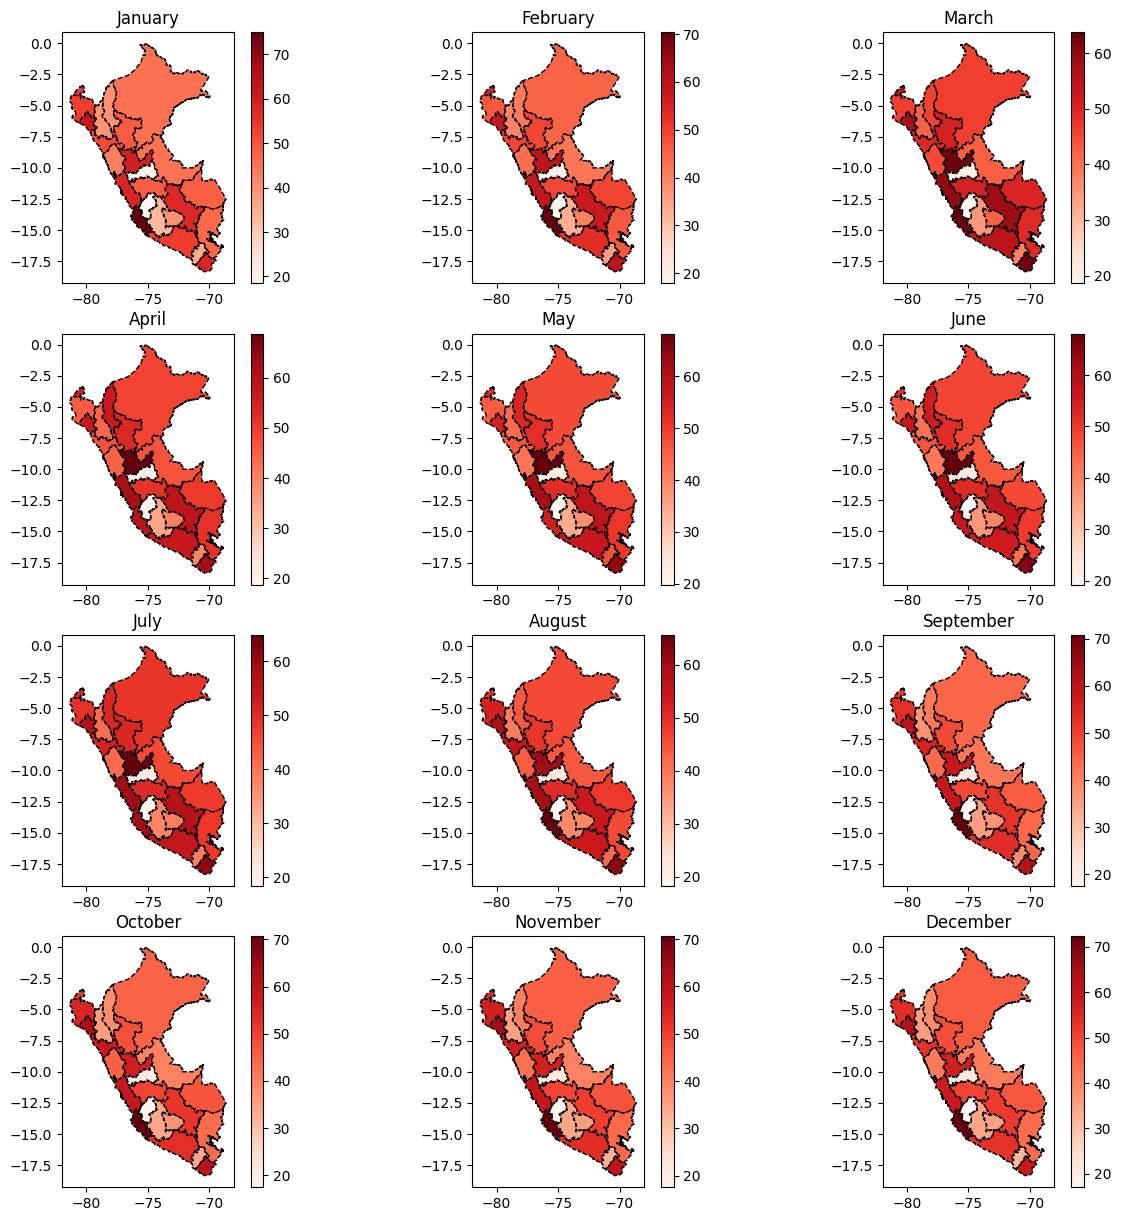

In [95]:
fig, axis = plt.subplots( nrows = 4, ncols= 3, figsize = ( 15, 15 ) )

idx = 0
for i in range( 4 ):
    for j in range ( 3 ):

        ax = axis[ i ][ j ]
        
        month = df5.month.unique()[ idx ]
        
        df6 = df5[ df5.month == month ]
        
        df6.plot( column='prop_wom', cmap='Reds', linestyle='--', edgecolor='black', legend = True, ax = ax)
        
        ax.set_title( month )
        
        idx = idx + 1

In [96]:
from textwrap import wrap

In [97]:
# Inverting colour map
cmap = plt.cm.OrRd

<Axes: >

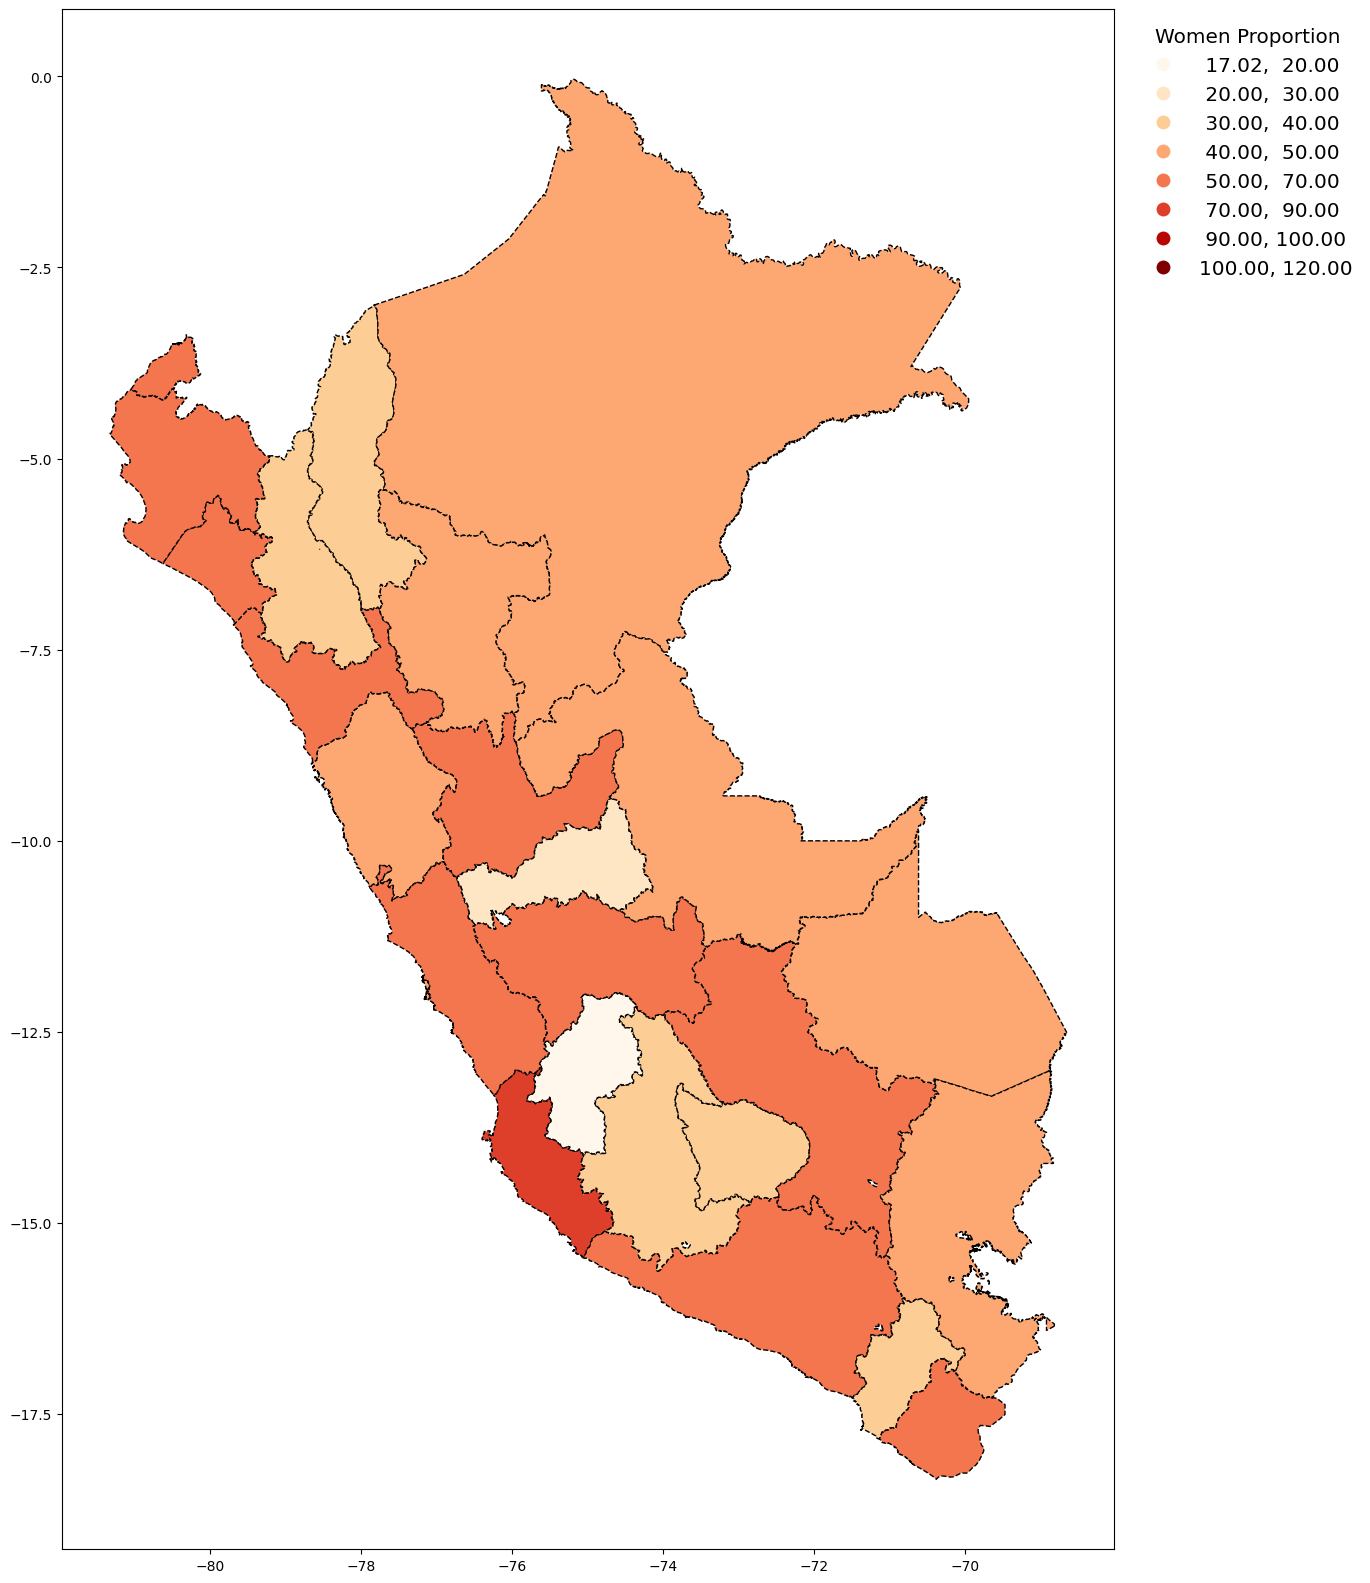

In [98]:
fig, ax = plt.subplots(figsize=(20, 20))
df6.plot( ax = ax, 
        column='prop_wom', 
         cmap= cmap, 
         figsize=(20, 20), 
         linestyle='--',
         edgecolor='black', 
         legend = True,  
         scheme = "User_Defined", 
         classification_kwds = dict( bins = [ 20, 30, 40, 50, 70, 90,  100, 120 ] ), 
         legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Women Proportion", 
                            title_fontsize = 'x-large', 
                            frameon= False )
        )


In [100]:
df6.loc[ (df6.NOMBDEP == 'LIMA'), 'prop_wom' ] = np.nan

<Axes: >

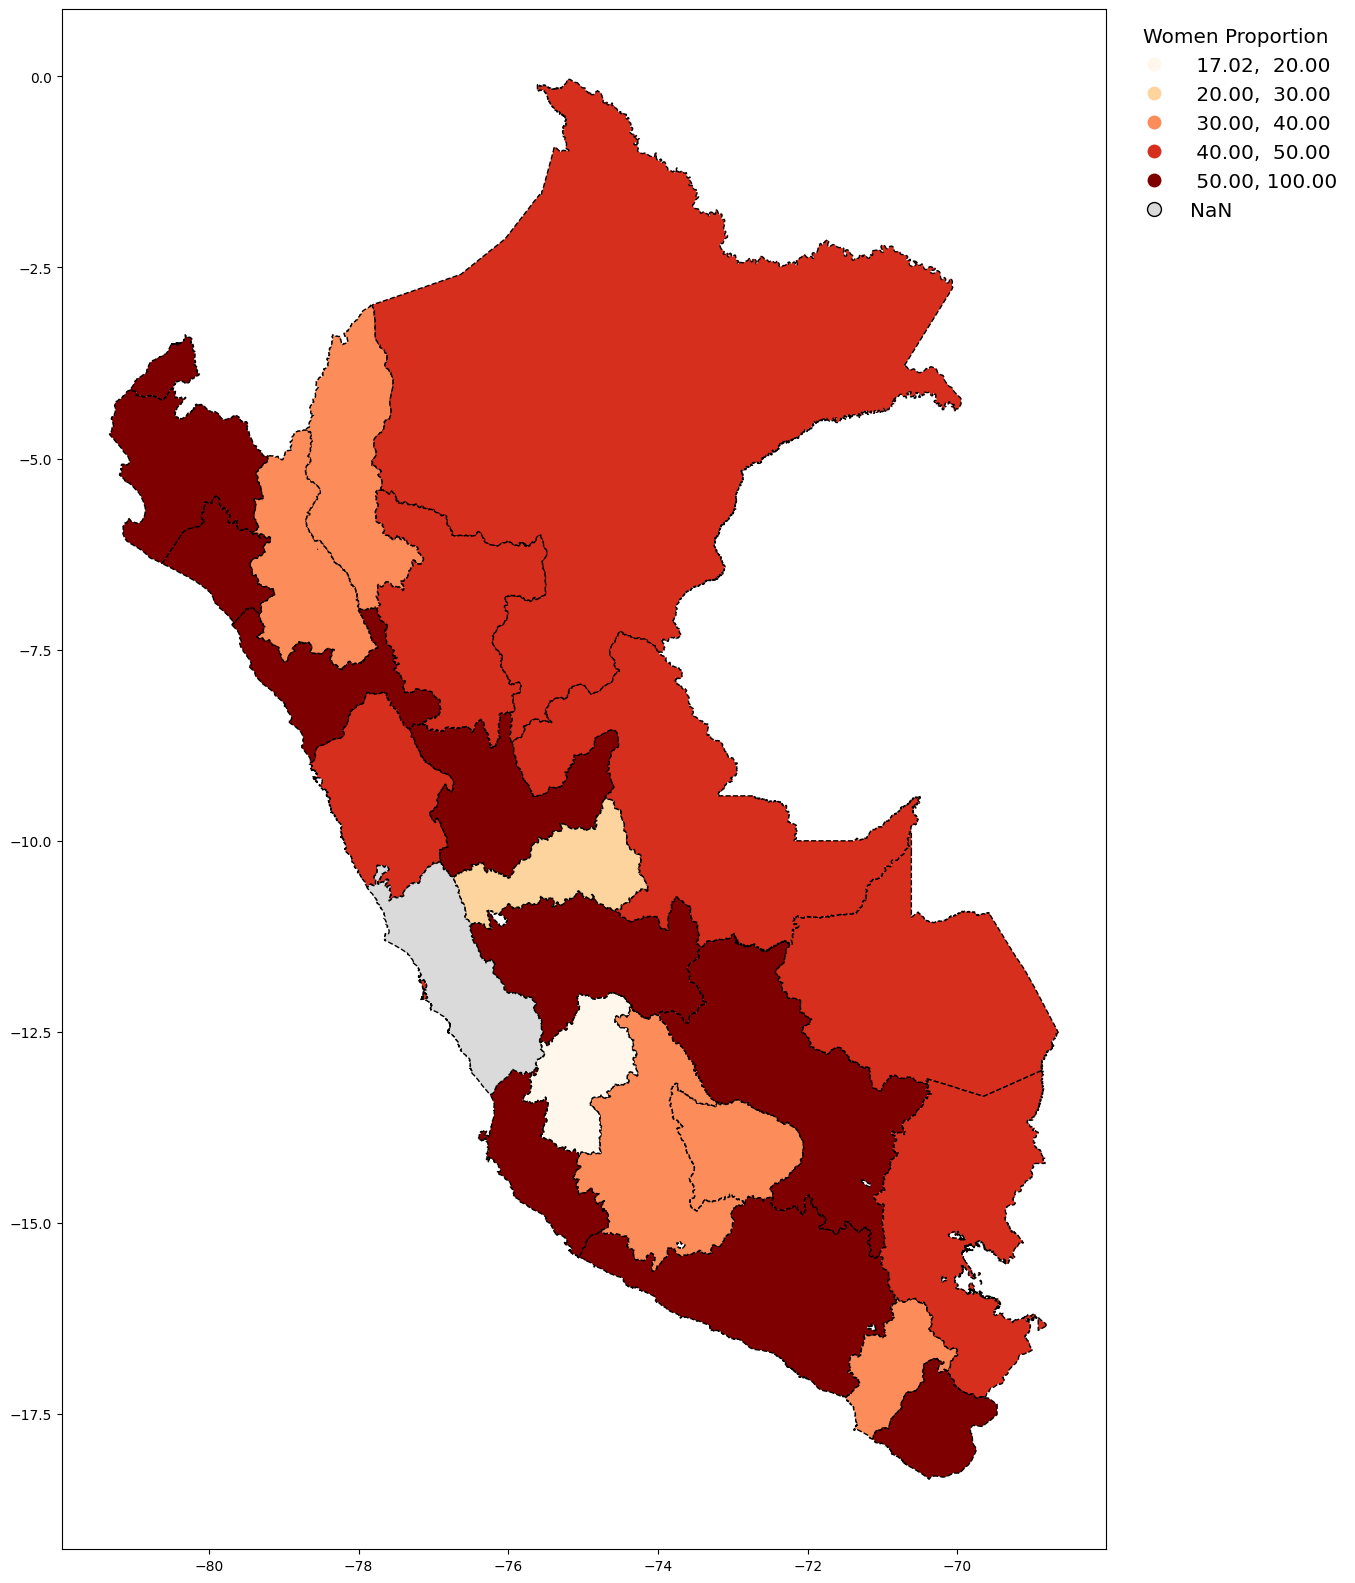

In [101]:
fig, ax = plt.subplots(figsize=(20, 20))
df6.plot( ax = ax, 
        column='prop_wom', 
         cmap= cmap, 
         figsize=(20, 20), 
         linestyle='--',
         edgecolor='black', 
         legend = True,  
         scheme = "User_Defined", 
         missing_kwds= dict(color = "#DADADB",), 
         classification_kwds = dict( bins = [ 20, 30, 40, 50,  100 ] ), 
         legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Women Proportion", 
                            title_fontsize = 'x-large', 
                            frameon= False )
        )

<Axes: >

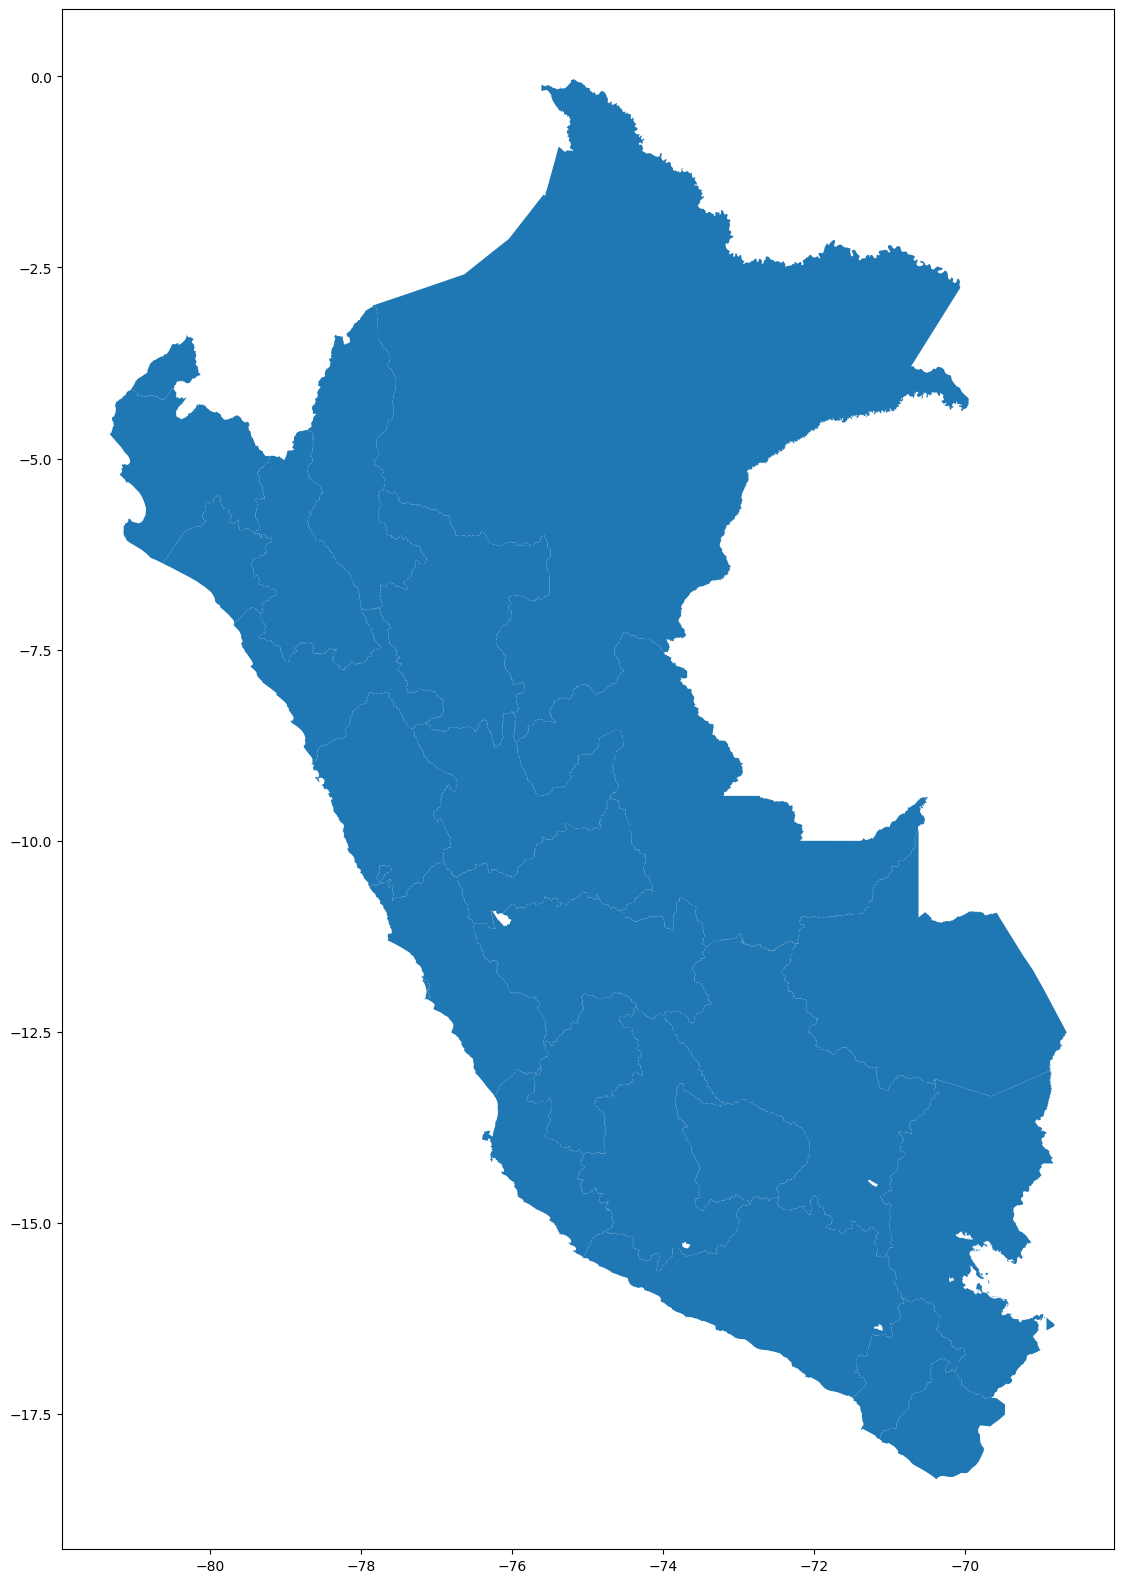

In [102]:
fig, ax = plt.subplots(figsize=(20, 20))
dpt_shp.plot( ax = ax )

In [103]:
dpt_shp['country'] = 'PERU'

In [104]:
ctr_shp = dpt_shp.dissolve( by = 'country')

<Axes: >

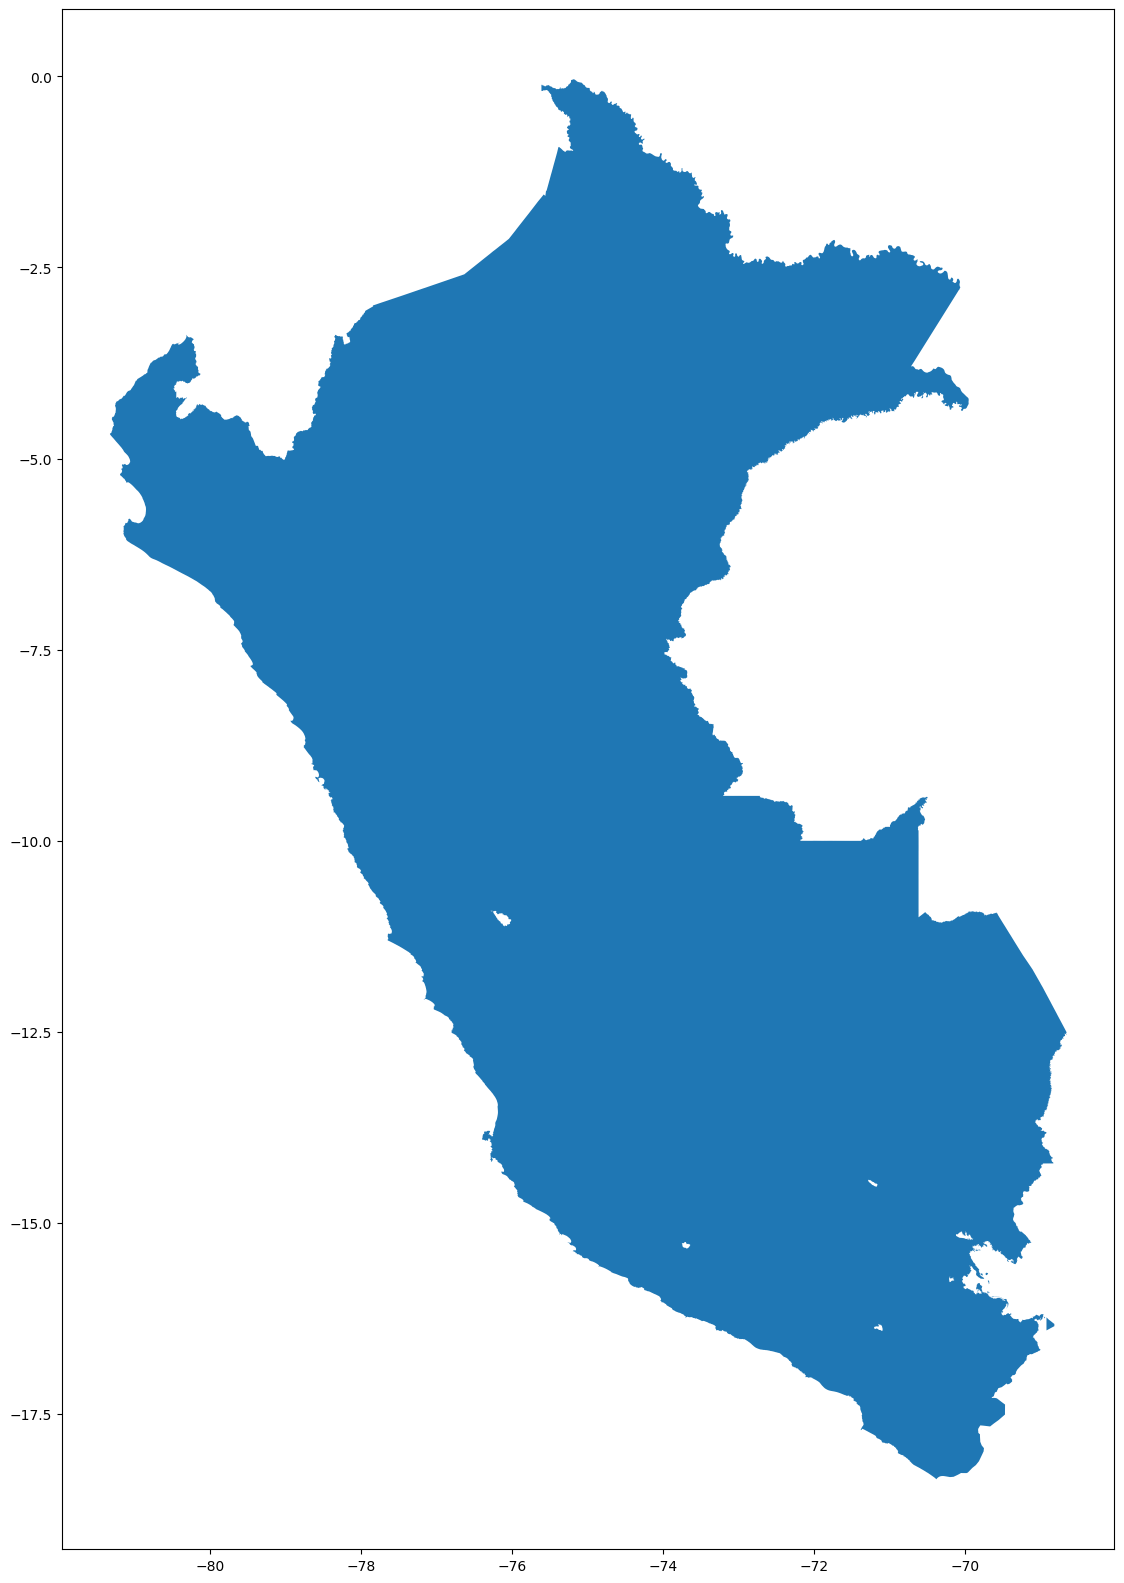

In [105]:
fig, ax = plt.subplots(figsize=(20, 20))
ctr_shp.plot( ax = ax )

Generating grids

In [112]:
# Import a Shapefile
dist_shp = gpd.read_file(r'../_data/shape_file/DISTRITOS.shp')
dist_shp.loc[dist_shp['DISTRITO']=="CHACLACAYO"]

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry
1293,15,LIMA,1501,LIMA,150107,CHACLACAYO,CHACLACAYO,0001,1,INEI,"POLYGON ((-76.72918 -11.96426, -76.72809 -11.9..."


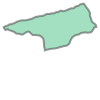

In [113]:
dist_shp["geometry"][1293] # CHACLACAYO

In [114]:
# Keep only smp geometry
cha_geo = dist_shp.query( "`PROVINCIA` == 'LIMA' & `DISTRITO` == 'CHACLACAYO'").geometry

In [115]:
# Generating grids
xmin, ymin, xmax, ymax= cha_geo.total_bounds

In [116]:
cha_geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [117]:
import shapely.geometry

In [124]:
# how many cells across and down
n_cells = 60
cell_size = (xmax-xmin)/n_cells
# projection of the grid
crs = 4326

# create the cells in a loop
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'], 
                                 crs=crs)

In [125]:
import matplotlib.pyplot as plt

<Axes: >

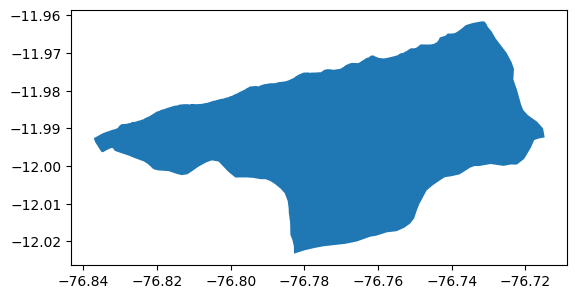

In [126]:
cha_geo.plot()

(np.float64(-76.84332821099996),
 np.float64(-76.70867226099996),
 np.float64(-12.026331755049878),
 np.float64(-11.958469453949963))

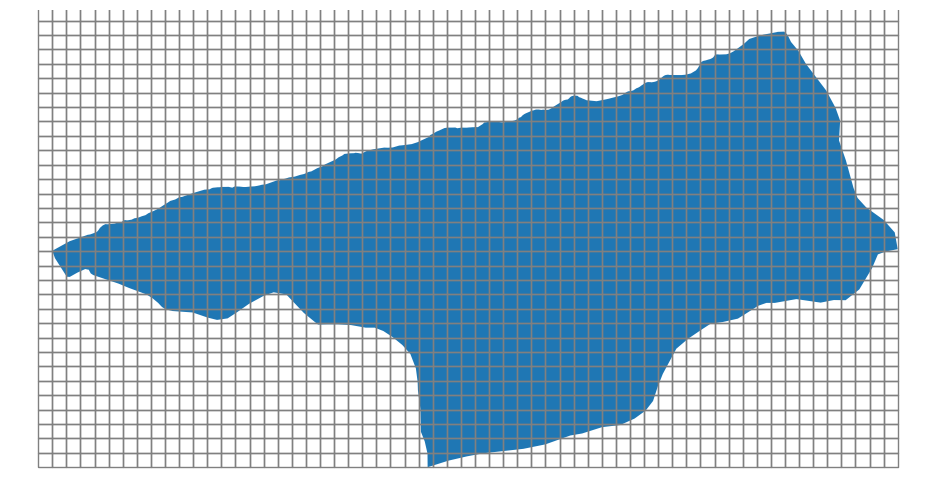

In [127]:
ax = cha_geo.plot(markersize=.1, figsize=(12, 8), )
plt.autoscale(False)
cell.plot( ax = ax , facecolor="none", edgecolor='grey')
ax.axis("off")


### Get Information from Raster

Un raster es un tipo de estructura de datos que representa información espacial en forma de una matriz de celdas o píxeles organizados en filas y columnas. Cada celda en un raster tiene un valor numérico que corresponde a una característica particular, como elevación, temperatura, uso del suelo, etc.

Características principales de un raster:

- Resolución espacial: Define el tamaño de cada celda en unidades del mundo real (por ejemplo, metros o kilómetros). Cuanto menor sea la resolución (tamaño de celda más pequeño), mayor será el detalle de la información representada.

- Extensión: El área geográfica que cubre el raster. Está determinada por el número de filas y columnas y el tamaño de las celdas.

- Bandas: Un raster puede tener una o más bandas. Por ejemplo, una imagen de satélite a menudo tiene varias bandas que capturan diferentes longitudes de onda de la luz (rojo, verde, azul, infrarrojo, etc.).

- Sistemas de referencia espacial: Un raster tiene un sistema de referencia espacial que define cómo se mapean las coordenadas de las celdas en el espacio geográfico.

Usos comunes:

 -Imágenes de satélite: Utilizadas en monitoreo ambiental, agricultura, y planificación urbana.

- Modelos de elevación: Representan la altura sobre el nivel del mar y se usan en análisis topográficos.

- Mapas climáticos: Como mapas de temperatura o precipitación.

- Análisis de cobertura del suelo: Para monitorear cambios en el uso del suelo, como deforestación.

Los rasteres son ampliamente utilizados en sistemas de información geográfica (SIG) para análisis espacial, modelado y visualización de datos geográficos.

In [6]:
#pip install rasterstats

In [7]:
from rasterstats import zonal_stats
import geopandas as gpd

In [8]:
# Load your vector data
dpt_shp = gpd.read_file( r'../_data/INEI_LIMITE_DEPARTAMENTAL/INEI_LIMITE_DEPARTAMENTAL.shp' )

# Specify your raster file
raster_path = '../_data/VIIRS_NTL_Peru_YearlyComposite_2021.tif'  # Change this to your raster file path


In [14]:
# Calculate zonal statistics
stats = zonal_stats(dpt_shp, raster_path, stats=["count", "min", "mean", "max", "sum"], all_touched=False)

# zonal_stats permite obtener la información de rasters para polígonos tipo shapefile
# The 'stats' variable is a list of dictionaries with the statistics for each feature in the vector file
# For example, to print the statistics for the first feature:
print(stats[0])
# es rápido porque son solo 24 departamentos

{'min': 0.0, 'max': 20.207500457763672, 'mean': 0.009677408154734994, 'count': 39676, 'sum': 383.9608459472656}


In [15]:
import pandas as pd

In [21]:
stats_gdf = pd.DataFrame(stats)
df1 = pd.concat([dpt_shp, stats_gdf], axis = 1)
df1
# count = número de pixeles

,OBJECTID_1,OBJECTID,CCDD,NOMBDEP,CAPITAL,Shape_STAr,Shape_STLe,ORIG_FID,Shape_Leng,Shape_Area,CORREO,CONTACTO,WHATSAPP,geometry,min,max,mean,count,sum
0,1,1.0,01,AMAZONAS,CHACHAPOYAS,3.203006,12.912088,0,12.912088,3.203006,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...",0.000000,20.207500,0.009479,40564,384.520844
1,2,2.0,02,ANCASH,HUARAZ,2.954592,11.780424,1,11.780424,2.954592,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.64697 -8.05086, -77.64689 -8.051...",0.000000,41.965000,0.091257,37349,3408.341553
2,3,3.0,03,APURIMAC,ABANCAY,1.765933,7.730154,2,7.730154,1.765933,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-73.74655 -13.17442, -73.7457 -13.17...",0.000000,62.582500,0.065940,22408,1477.590088
3,4,4.0,04,AREQUIPA,AREQUIPA,5.330203,17.405040,3,17.405040,5.330203,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6...",0.000000,114.922501,0.159932,67153,10739.937500
4,5,5.0,05,AYACUCHO,AYACUCHO,3.643705,17.127166,4,17.127166,3.643705,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-74.34843 -12.17503, -74.35 -12.1758...",0.000000,37.331249,0.035613,46294,1648.689575
5,6,6.0,06,CAJAMARCA,CAJAMARCA,2.684527,12.397424,5,12.397424,2.684527,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-78.22182 -7.76346, -78.22233 -7.763...",0.000000,56.949997,0.074247,34102,2531.979736
6,7,7.0,07,CALLAO,CALLAO,0.011738,1.111221,6,1.111221,0.011738,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.13504 -11.8182, -77.13484 -11.81...",3.388333,123.460007,31.195534,198,6176.715820
7,8,8.0,08,CUSCO,CUSCO,6.000331,21.794434,7,21.794434,6.000331,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-72.9728 -11.25189, -72.97134 -11.25...",0.000000,182.017502,0.073036,75742,5531.875000
8,9,9.0,09,HUANCAVELICA,HUANCAVELICA,1.839851,9.561245,8,9.561245,1.839851,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-74.57118 -11.9871, -74.57095 -11.98...",0.000000,23.056250,0.020849,23430,488.493317
9,10,10.0,10,HUANUCO,HUANUCO,3.089811,14.589840,9,14.589840,3.089811,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-75.992 -8.32108, -75.99015 -8.32171...",0.000000,25.650002,0.020131,39259,790.317444


In [18]:
# Calculate zonal statistics
stats = zonal_stats(dpt_shp, raster_path, stats=["count", "min", "mean", "max", "sum"], all_touched=True)


In [19]:
stats_gdf = pd.DataFrame(stats)
df1 = pd.concat([dpt_shp, stats_gdf], axis = 1)

In [20]:
df1

,OBJECTID_1,OBJECTID,CCDD,NOMBDEP,CAPITAL,Shape_STAr,Shape_STLe,ORIG_FID,Shape_Leng,Shape_Area,CORREO,CONTACTO,WHATSAPP,geometry,min,max,mean,count,sum
0,1,1.0,01,AMAZONAS,CHACHAPOYAS,3.203006,12.912088,0,12.912088,3.203006,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...",0.000000,20.207500,0.009479,40564,384.520844
1,2,2.0,02,ANCASH,HUARAZ,2.954592,11.780424,1,11.780424,2.954592,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.64697 -8.05086, -77.64689 -8.051...",0.000000,41.965000,0.091257,37349,3408.341553
2,3,3.0,03,APURIMAC,ABANCAY,1.765933,7.730154,2,7.730154,1.765933,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-73.74655 -13.17442, -73.7457 -13.17...",0.000000,62.582500,0.065940,22408,1477.590088
3,4,4.0,04,AREQUIPA,AREQUIPA,5.330203,17.405040,3,17.405040,5.330203,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6...",0.000000,114.922501,0.159932,67153,10739.937500
4,5,5.0,05,AYACUCHO,AYACUCHO,3.643705,17.127166,4,17.127166,3.643705,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-74.34843 -12.17503, -74.35 -12.1758...",0.000000,37.331249,0.035613,46294,1648.689575
5,6,6.0,06,CAJAMARCA,CAJAMARCA,2.684527,12.397424,5,12.397424,2.684527,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-78.22182 -7.76346, -78.22233 -7.763...",0.000000,56.949997,0.074247,34102,2531.979736
6,7,7.0,07,CALLAO,CALLAO,0.011738,1.111221,6,1.111221,0.011738,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.13504 -11.8182, -77.13484 -11.81...",3.388333,123.460007,31.195534,198,6176.715820
7,8,8.0,08,CUSCO,CUSCO,6.000331,21.794434,7,21.794434,6.000331,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-72.9728 -11.25189, -72.97134 -11.25...",0.000000,182.017502,0.073036,75742,5531.875000
8,9,9.0,09,HUANCAVELICA,HUANCAVELICA,1.839851,9.561245,8,9.561245,1.839851,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-74.57118 -11.9871, -74.57095 -11.98...",0.000000,23.056250,0.020849,23430,488.493317
9,10,10.0,10,HUANUCO,HUANUCO,3.089811,14.589840,9,14.589840,3.089811,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-75.992 -8.32108, -75.99015 -8.32171...",0.000000,25.650002,0.020131,39259,790.317444
